<a href="https://colab.research.google.com/github/leonfullxr/Classifying-Mushrooms/blob/main/Clasificacion_de_setas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<header>
  <h1 align="center">Proyecto Final - Clasificación de Setas</h1>
  <h2 align="center">Aprendizaje Automático</h2>
  <h3 align="center">CURSO 2023-2024</h3>
</header>

<p align="center">
  <strong>Trabajo realizado por:</strong><br>
  Rafael Carrillo Arroyo.<br>
  Leon Elliott Fuller.<br>
  Pablo Gervilla Miranda. <br>
  Andrés Hurtado Morón.<br>
  <strong>Correo:</strong> <a href="mailto:leonfuller@correo.ugr.es">leonfuller@correo.ugr.es</a><br>
  <strong>Correo:</strong> <a href="mailto:rafacarrillo@correo.ugr.es">rafacarrillo@correo.ugr.es</a><br>
  <strong>Correo:</strong> <a href="mailto:andreshurtado@correo.ugr.es">andreshurtado@correo.ugr.es</a><br>
</p>

---

# 1.Introducción

Descripcion: Este conjunto de datos incluye 61.069 ejemplos de setas con sombreros basados en 173 especies (353 setas por especie). Cada seta se identifica como definitivamente
comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada
(esta ultima clase se combino con la clase venenosa). Se emplean 20 caracterısticas de
naturaleza heterogenea para su clasificacion y presentando datos faltantes.
Referencias: https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset y Wagner, Dennis, Dominik Heider, and Georges Hattab. “Mushroom data creation, curation,
and simulation to support classification tasks.”Scientific reports 11.1 (2021): 8134.


***Librerias necesarias:***

In [1]:
#Por si el de abajo no funciona

import sklearn
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd

# Actualizamos scikit-learn para tener la última versión.
import sklearn
if sklearn.__version__ < '1.3':
  !pip install scikit-learn --upgrade
else:
  print('La versión de scikit-learn es: ', sklearn.__version__)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 4.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


***Cargamos datos***

**1ºForma**

In [4]:
# Para instalar el repositorio de la UCI
!pip install ucimlrepo

# Para importar los datos del repositorio
from ucimlrepo import fetch_ucirepo

# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# data (as pandas dataframes)
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

# metadata
print(secondary_mushroom.metadata)

# variable information
print(secondary_mushroom.variables)

{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'title': 'Mushroom data creation, curation, and simulation to support classification tasks', 'authors': 'Dennis Wagner, D. Heider, Georges Hattab', 'published_in': 'Scientific Reports', 'year': 2021, 'url': 'https://www.semanticscholar.org/

TypeError: 'numpy.int64' object is not callable

In [5]:
print(X.shape)

(61069, 20)


**2ºForma**

In [ ]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
dataFolder = 'drive/MyDrive/Colab Notebooks/MushroomDataset/Setas/'


Mounted at /content/drive


In [ ]:
# Ruta de los archivos CSV en tu carpeta de Google Drive
primary_data_path = '/content/drive/MyDrive/Colab Notebooks/Setas/MushroomDataset/primary_data.csv'
secondary_data_path = '/content/drive/MyDrive/Colab Notebooks/Setas/MushroomDataset/secondary_data.csv'

# Cargar datos primarios
primary_data = pd.read_csv(primary_data_path, delimiter=';')

# Cargar datos secundarios
secondary_data = pd.read_csv(secondary_data_path)


***Vista inicial de los datos***

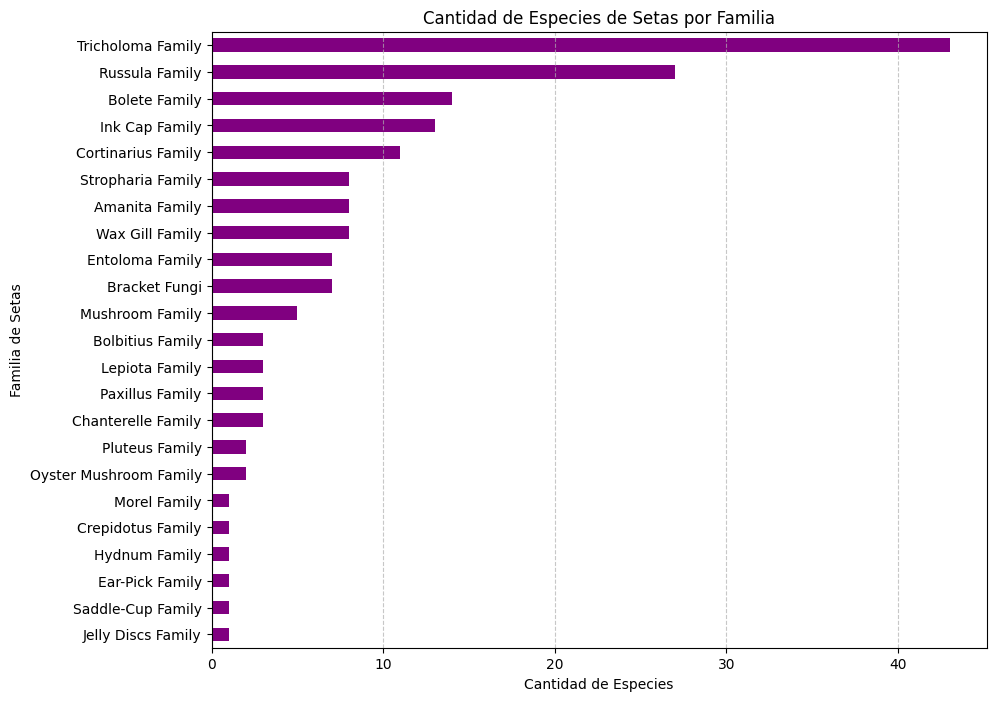

In [ ]:
# Cargar el archivo CSV primario
df = pd.read_csv(primary_data_path, delimiter=';')

# Contar la cantidad de especies por familia
species_per_family = df['family'].value_counts()

# Ordenar las familias por cantidad de especies (de mayor a menor)
species_per_family = species_per_family.sort_values(ascending=True)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 8))
species_per_family.plot(kind='barh', color='purple')
plt.xlabel('Cantidad de Especies')
plt.ylabel('Familia de Setas')
plt.title('Cantidad de Especies de Setas por Familia')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# 2.Preprocesamiento de los Datos

In [ ]:
# Imprimir el numero de caracteristicas
X

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


Comprobar si podemos/debemos aplicar PCA


In [3]:
!pip install numpy --upgrade
!pip install scikit-learn --upgrade
!pip install ucimlrepo

# Generamos una gráfica con las varianzas explicadas y las varianzas excplicadas acumuladas
# Aplicamos PCA
from ucimlrepo import fetch_ucirepo
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(X)

# Varianza explicada y Varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Creamos las gráficas, uno al lado del otro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Varianza explicada
ax1.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance by Principal Components')

# Varianza explicada acumulada
ax2.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
ax2.set_xlabel('Principal Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance by Principal Components')

plt.tight_layout()
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 27.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


ImportError: cannot import name '_is_numpy_namespace' from 'sklearn.utils._array_api' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py)

###PRUEBAS ANDRES

Vamos a ver cuantos valores faltantes tenemos en cada columna

In [ ]:
missing_values = X.isnull().sum()
print(missing_values)

cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64


Se observa como hay varias columnas con muchos datos faltantes , por lo que podriamos pensar que es mejor borrar estas caracteristicas directamente.

por ejemplo: stem-root, veil-type, veil-color y spore-paint-color tienen > 50000 valores faltantes (de 61069)

Quizás para el resto de columnas con valores faltantes, podriamos hacerle un input con la media o la moda

In [ ]:
# Separar columnas numéricas y categóricas
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns



In [ ]:
# Verificar valores faltantes
missing_values = X.isnull().sum()
total_rows = X.shape[0]

# Definir umbral (por ejemplo, 50%)
threshold = 0.5

# Eliminar columnas con más del 50% de valores faltantes
columns_to_drop = missing_values[missing_values > threshold * total_rows].index
X_clean = X.drop(columns=columns_to_drop,inplace=False)


print("Columnas eliminadas debido a muchos valores faltantes:", columns_to_drop)


Columnas eliminadas debido a muchos valores faltantes: Index(['stem-root', 'stem-surface', 'veil-type', 'veil-color',
       'spore-print-color'],
      dtype='object')


In [ ]:
X_clean.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,w,t,g,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,w,t,g,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,w,t,g,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,w,t,p,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,w,t,p,d,w


In [ ]:
missing_values = X_clean.isnull().sum()
print(missing_values)

cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
dtype: int64


In [ ]:
# Imputar valores faltantes en columnas numéricas con la media
X_clean[numeric_cols] = X_clean[numeric_cols].fillna(X_clean[numeric_cols].mean())

# Imputar valores faltantes en columnas categóricas con la moda
#X_clean[categorical_cols] = X_clean[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


In [ ]:
# Convertir variables categóricas a variables dummy (one-hot encoding)
X_encoded = pd.get_dummies(X_clean)
# Eliminar filas duplicadas
X_final = X_encoded.drop_duplicates()


In [ ]:
X_final.head()

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,15.26,16.95,17.09,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,16.60,17.99,18.19,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,14.07,17.80,17.74,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,14.17,15.77,15.98,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,14.64,16.53,17.20,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar/estandarizar los datos
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_final), columns=X_final.columns)

print("Dataset limpio y preparado:\n", X_scaled.head())

Dataset limpio y preparado:
    cap-diameter  stem-height  stem-width  cap-shape_b  cap-shape_c  \
0      1.616820     3.082356    0.489669    -0.321089    -0.175233   
1      1.871167     3.391996    0.599337    -0.321089    -0.175233   
2      1.390945     3.335427    0.554473    -0.321089    -0.175233   
3      1.409926     2.731032    0.379004    -0.321089    -0.175233   
4      1.499137     2.957308    0.500636    -0.321089    -0.175233   

   cap-shape_f  cap-shape_o  cap-shape_p  cap-shape_s  cap-shape_x  ...  \
0    -0.531109    -0.239922    -0.211053     -0.36505     1.123434  ...   
1    -0.531109    -0.239922    -0.211053     -0.36505     1.123434  ...   
2    -0.531109    -0.239922    -0.211053     -0.36505     1.123434  ...   
3     1.882853    -0.239922    -0.211053     -0.36505    -0.890128  ...   
4    -0.531109    -0.239922    -0.211053     -0.36505     1.123434  ...   

   habitat_h  habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  season_a  \
0  -0.184283  -0.2

In [ ]:
y = y.reset_index(drop=True)

# Eliminar filas duplicadas en X_encoded y sincronizar y
X_final = X_encoded.drop_duplicates()
y_final = y.loc[X_final.index]

In [ ]:
from sklearn.model_selection import train_test_split

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_final, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Inicializar el modelo
clf = RandomForestClassifier(random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)


<ipython-input-19-2dbf1d1211db>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predecir los valores del conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


Precisión del modelo: 1.00


In [ ]:
from sklearn.model_selection import cross_val_score

# Validación cruzada con 5 folds
cv_scores = cross_val_score(clf, X_scaled, y_final, cv=5)

print(f"Puntuaciones de validación cruzada: {cv_scores}")
print(f"Precisión media de validación cruzada: {cv_scores.mean():.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Puntuaciones de validación cruzada: [0.49167009 0.52786213 0.65506771 0.58798424 0.75681221]
Precisión media de validación cruzada: 0.60


###--

In [ ]:
pip install scikit-learn


  Using cached scikit_learn-1.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Supongamos que X y y contienen tus datos y etiquetas respectivamente

# Inicializar el codificador OneHotEncoder
encoder = OneHotEncoder()

# Convertir las características categóricas en variables dummy
X_encoded = encoder.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar el clasificador de Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el clasificador
rf_classifier.fit(X_train, y_train)

# Generar cinco ejemplos
for i in range(5):
    # Seleccionar un índice aleatorio del conjunto de prueba
    random_index = np.random.randint(0, X_test.shape[0])
    example_X = X_test[random_index]
    example_y_true = y_test[random_index]

    # Predecir la etiqueta para el ejemplo
    example_y_pred = rf_classifier.predict(example_X.reshape(1, -1))[0]

    # Imprimir el ejemplo y la predicción
    print("Ejemplo {}: Características: {}, Etiqueta Verdadera: {}, Predicción: {}".format(i+1, example_X, example_y_true, example_y_pred))

# Calcular la precisión del modelo
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nPrecisión del modelo de Random Forest:", accuracy)


ImportError: cannot import name '_fit_context' from 'sklearn.base' (/usr/local/lib/python3.10/dist-packages/sklearn/base.py)

# 3.Definición del protocolo de validación experimental

# 4.Selección de los modelos a emplear para el problema

# 5.Selección y estimación de valores para hiperparámetros

# 6.Discusión de resultados y extracción de conclusiones

# Bibliografia
- Paper 1: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=10428619&tag=1
- Notebook 1: https://www.kaggle.com/code/nirajvermafcb/comparing-various-ml-models-roc-curve-comparison

# Notas Adicionales

1. <font color='white'> Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.

* Apartado 1-3: Leon (Apartado 3 aplicamos K-fold=5)
* Apartado 2: Andres
* Apartado 4-5: Pablo
* Apartado 6: Rafa